## Table of Contents

1. Loading the dataset
2. Data Pre-processing
3. Rule 1 - Extracting the sentences with President's mention
4. Rule 2 - Extracting the mentions of initiatives
5. Rule 3 - Relation Extraction part 1
6. Rule 4 - Relation Extraction part 2
7. Combining Rule 3 and Rule 4
8. Rule 5: Patterns using Preposition

## 1. Loading the dataset

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# extract the zip file
!unzip '/content/drive/MyDrive/UNGDC19702018-200902-235056.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Converted sessions/Session 63 - 2008/PHL_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._PHL_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/DZA_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._DZA_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/MEX_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._MEX_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/AUT_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._AUT_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/COG_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._COG_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/CYP_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._CYP_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/SLB_63_2008.txt  

In [ ]:
# folders of different sessions of speeches
!ls Converted\ sessions

'Session 25 - 1970'  'Session 42 - 1987'  'Session 59 - 2004'
'Session 26 - 1971'  'Session 43 - 1988'  'Session 60 - 2005'
'Session 27 - 1972'  'Session 44 - 1989'  'Session 61 - 2006'
'Session 28 - 1973'  'Session 45 - 1990'  'Session 62 - 2007'
'Session 29 - 1974'  'Session 46 - 1991'  'Session 63 - 2008'
'Session 30 - 1975'  'Session 47 - 1992'  'Session 64 - 2009'
'Session 31 - 1976'  'Session 48 - 1993'  'Session 65 - 2010'
'Session 32 - 1977'  'Session 49 - 1994'  'Session 66 - 2011'
'Session 33 - 1978'  'Session 50 - 1995'  'Session 67 - 2012'
'Session 34 - 1979'  'Session 51 - 1996'  'Session 68 - 2013'
'Session 35 - 1980'  'Session 52 - 1997'  'Session 69 - 2014'
'Session 36 - 1981'  'Session 53 - 1998'  'Session 70 - 2015'
'Session 37 - 1982'  'Session 54 - 1999'  'Session 71 - 2016'
'Session 38 - 1983'  'Session 55 - 2000'  'Session 72 - 2017'
'Session 39 - 1984'  'Session 56 - 2001'  'Session 73 - 2018'
'Session 40 - 1985'  'Session 57 - 2002'
'Session 41 - 1986'  'Session

In [ ]:
# speeches in a single folder
!ls Converted\ sessions/Session\ 25\ -\ 1970 

ALB_25_1970.txt  GBR_25_1970.txt  LBN_25_1970.txt  SLE_25_1970.txt
ARG_25_1970.txt  GHA_25_1970.txt  LBR_25_1970.txt  SLV_25_1970.txt
AUS_25_1970.txt  GIN_25_1970.txt  LBY_25_1970.txt  SOM_25_1970.txt
AUT_25_1970.txt  GMB_25_1970.txt  LKA_25_1970.txt  SYR_25_1970.txt
BEL_25_1970.txt  GTM_25_1970.txt  MAR_25_1970.txt  TGO_25_1970.txt
BLR_25_1970.txt  HND_25_1970.txt  MDG_25_1970.txt  THA_25_1970.txt
BOL_25_1970.txt  HTI_25_1970.txt  MEX_25_1970.txt  TTO_25_1970.txt
BRA_25_1970.txt  IDN_25_1970.txt  MMR_25_1970.txt  TUN_25_1970.txt
CAN_25_1970.txt  IND_25_1970.txt  NLD_25_1970.txt  TUR_25_1970.txt
CMR_25_1970.txt  IRN_25_1970.txt  NOR_25_1970.txt  UKR_25_1970.txt
COG_25_1970.txt  IRQ_25_1970.txt  NZL_25_1970.txt  URY_25_1970.txt
COL_25_1970.txt  ISL_25_1970.txt  PAK_25_1970.txt  USA_25_1970.txt
CRI_25_1970.txt  ISR_25_1970.txt  PER_25_1970.txt  VEN_25_1970.txt
CUB_25_1970.txt  ITA_25_1970.txt  PHL_25_1970.txt  YUG_25_1970.txt
DOM_25_1970.txt  JPN_25_1970.txt  PRY_25_1970.txt  ZAF_25_1970

## 2. Data Pre-processing

In [ ]:
# importing libraries
import glob
import pandas as pd
import re

In [ ]:
# names of all the folders in the dataset
folders = glob.glob('Converted sessions/Session*')

In [ ]:
# list of folders
folders

['Converted sessions/Session 58 - 2003',
 'Converted sessions/Session 41 - 1986',
 'Converted sessions/Session 54 - 1999',
 'Converted sessions/Session 52 - 1997',
 'Converted sessions/Session 32 - 1977',
 'Converted sessions/Session 64 - 2009',
 'Converted sessions/Session 67 - 2012',
 'Converted sessions/Session 51 - 1996',
 'Converted sessions/Session 25 - 1970',
 'Converted sessions/Session 48 - 1993',
 'Converted sessions/Session 59 - 2004',
 'Converted sessions/Session 70 - 2015',
 'Converted sessions/Session 40 - 1985',
 'Converted sessions/Session 35 - 1980',
 'Converted sessions/Session 45 - 1990',
 'Converted sessions/Session 65 - 2010',
 'Converted sessions/Session 34 - 1979',
 'Converted sessions/Session 49 - 1994',
 'Converted sessions/Session 56 - 2001',
 'Converted sessions/Session 44 - 1989',
 'Converted sessions/Session 69 - 2014',
 'Converted sessions/Session 72 - 2017',
 'Converted sessions/Session 66 - 2011',
 'Converted sessions/Session 33 - 1978',
 'Converted sess

In [ ]:
# creating a Dataframe to store the speeches
df = pd.DataFrame(columns={'Country','Speech','Session','Year'})

In [ ]:
# read speeches by USA
i = 0 
# for each folder
for file in folders:
    # getting the txt file containing speech of USA    
    speech = glob.glob(file+'/USA*.txt')
    # reading the txt file
    with open(speech[0],encoding='utf8') as f:
        # reading the speech
        df.loc[i,'Speech'] = f.read()
        # extracting the year of speech
        df.loc[i,'Year'] = speech[0].split('_')[-1].split('.')[0]
        # extracting the session
        df.loc[i,'Session'] = speech[0].split('_')[-2]
        # storing the country name
        df.loc[i,'Country'] = speech[0].split('_')[0].split("/")[-1]
        # Increment counter
        i += 1

In [ ]:
# first 5 rows of the created dataset    
df.head()

,Year,Speech,Session,Country
0,2003,"﻿Twenty-four months ago, and\nyesterday in the...",58,USA
1,1986,A short walk from this Hall is the delegates' ...,41,USA
2,1999,"Today, we look ahead to the\nnew millennium. A...",54,USA
3,1997,"﻿Five years ago, when I first\naddressed this ...",52,USA
4,1977,"﻿1.\t Mr. President, I wish to offer you my co...",32,USA


In [ ]:
# sample speech from the dataset
df['Speech'][2]

'Today, we look ahead to the\nnew millennium. And at this last General Assembly of the\ntwentieth century, we look back on a century that taught\nus much of what we need to know about the promise of\ntomorrow. We have learned a great deal over the last one\nhundred years: how to produce enough food for a\ngrowing world population; how human activity affects the\nenvironment; the mysteries of the human gene. An\ninformation revolution now holds the promise of universal\naccess to knowledge. We have learned that open markets\ncreate more wealth, that open societies are more just. We\nhave learned how to come together, through the United\nNations and other institutions, to advance common\ninterests and values.\nYet for all our intellectual and material advances, the\ntwentieth century has been deeply scarred by enduring\nhuman failures: by greed and lust for power, by\nhot-blooded hatreds and stone-cold hearts. At century’s\nend, modern developments magnify greatly the dangers of\nthese t

In [ ]:
# function to preprocess speech
def clean(text):
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
        
    return text

In [ ]:
# preprocessing speeches
df['Speech_clean'] = df['Speech'].apply(clean)

In [ ]:
# first 5 rows of the dataset
df.head()

,Year,Speech,Session,Country,Speech_clean
0,2003,"﻿Twenty-four months ago, and\nyesterday in the...",58,USA,"﻿Twenty four months ago, and yesterday in the ..."
1,1986,A short walk from this Hall is the delegates' ...,41,USA,A short walk from this Hall is the delegates' ...
2,1999,"Today, we look ahead to the\nnew millennium. A...",54,USA,"Today, we look ahead to the new millennium. An..."
3,1997,"﻿Five years ago, when I first\naddressed this ...",52,USA,"﻿Five years ago, when I first addressed this A..."
4,1977,"﻿1.\t Mr. President, I wish to offer you my co...",32,USA,"﻿ Mr President, I wish to offer you my congrat..."


In [ ]:
# sample cleaned speech
df['Speech_clean'][1]

"A short walk from this Hall is the delegates' Meditation Room, a refuge from a world deafened by the noise of strife and violence. We want to bring back the idea of worship, Dag Haramarskjold once said about this room, devotion to something which is greater and higher than we are ourselves. It is just such devotion that gave birth to the United Nations: devotion to the dream of world peace and freedom, of human rights and democratic self determination, of a time when, in those ancient words, ... they shall beat their swords into plowshares ... nation shall not lift up sword against nation, neither shall they learn war any more. The United States remains committed to the United Nations. For over 40 years, this Organization has provided an international forum for harmonizing conflicting national interests and has made a significant contribution in such fields as peace keeping, humanitarian assistance, and eradicating disease. Yet, no one knows better than those in this Hall how the nobl

In [ ]:
# splitting sentences
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

In [ ]:
# creating a new column to store the sentences
df['Sentence'] = df['Speech_clean'].apply(sentences)

In [ ]:
# first 5 rows
df.head()

,Year,Speech,Session,Country,Speech_clean,Sentence
0,2003,"﻿Twenty-four months ago, and\nyesterday in the...",58,USA,"﻿Twenty four months ago, and yesterday in the ...","[﻿Twenty four months ago, and yesterday in the..."
1,1986,A short walk from this Hall is the delegates' ...,41,USA,A short walk from this Hall is the delegates' ...,[A short walk from this Hall is the delegates'...
2,1999,"Today, we look ahead to the\nnew millennium. A...",54,USA,"Today, we look ahead to the new millennium. An...","[Today, we look ahead to the new millennium, ..."
3,1997,"﻿Five years ago, when I first\naddressed this ...",52,USA,"﻿Five years ago, when I first addressed this A...","[﻿Five years ago, when I first addressed this ..."
4,1977,"﻿1.\t Mr. President, I wish to offer you my co...",32,USA,"﻿ Mr President, I wish to offer you my congrat...","[﻿ Mr President, I wish to offer you my congra..."


In [ ]:
# sample sentence list from the dataset
df['Sentence'][1]

["A short walk from this Hall is the delegates' Meditation Room, a refuge from a world deafened by the noise of strife and violence",
 ' We want to bring back the idea of worship, Dag Haramarskjold once said about this room, devotion to something which is greater and higher than we are ourselves',
 ' It is just such devotion that gave birth to the United Nations: devotion to the dream of world peace and freedom, of human rights and democratic self determination, of a time when, in those ancient words, ',
 '',
 '',
 ' they shall beat their swords into plowshares ',
 '',
 '',
 ' nation shall not lift up sword against nation, neither shall they learn war any more',
 ' The United States remains committed to the United Nations',
 ' For over 40 years, this Organization has provided an international forum for harmonizing conflicting national interests and has made a significant contribution in such fields as peace keeping, humanitarian assistance, and eradicating disease',
 ' Yet, no one know

In [ ]:
# create a dataframe containing sentences
df2 = pd.DataFrame(columns=['Sentence','Year','Len'])

row_list = []

# for each speech
for i in range(len(df)):
    # for each sentence
    for sent in df.loc[i,'Sentence']:
    
        # calculating the word count in a sentence
        wordcount = len(sent.split())
        # extracting the year of speech
        year = df.loc[i,'Year']

        dict1 = {'Year':year,'Sentence':sent,'Len':wordcount}
        row_list.append(dict1)
    
df2 = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len
0,2003,"﻿Twenty four months ago, and yesterday in the ...",30
1,2003,"Since that day, terrorists have struck in Bal...",34
2,2003,"Last month, terrorists brought their war to t...",11
3,2003,The United Nations headquarters in Baghdad st...,11
4,2003,"For that reason, the terrorists decided it mu...",10


In [ ]:
# shape of the dataset
df2.shape

(8948, 3)

Sample sentences from dataset:

1.  For that reason, **President Reagan**, in his speech to this body last year, proposed that the United States and the Soviet Union exchange visits of experts at test sites to measure directly the yields of nuclear weapon test
2.  **President Reagan** has directed our scientists and engineers to examine, in the light of new technologies and fully in accord with the Anti Ballistic Missile Treaty   the feasibility of defense against ballistic missile attack
3.   **President Reagan** approach to foreign policy is  grounded squarely on standards drawn from the  pragmatic American experience
4.  Let me start by joining the **President of Brazil** in conveying to the people and Government of Mexico our deep sympathy over the devastation wrought by earthquakes and our solidarity with them as they work to recover and rebuild

## 3. Rule 1 - Extracting the sentences with President's mention

In [ ]:
# importing spacy and its matcher function
import spacy
from spacy.matcher import Matcher

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
# function to find sentences mentioning president
def find_names(text):
    
    names = []
    
    # spacy doc
    doc = nlp(text)
    
    # pattern
    pattern = [{'LOWER':'president'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]
                
    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("names",[pattern]) 

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):
        
        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))
            
    return names

In [ ]:
# extracting sentences with president's mentions
extracted_sentences = []
for i in range(df2.shape[0]):
    extracted_sentences.append(find_names(df2['Sentence'][i]))

# storing the extracted sentences in the dataframe
df2['President_Names'] = extracted_sentences

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names
0,2003,"﻿Twenty four months ago, and yesterday in the ...",30,[]
1,2003,"Since that day, terrorists have struck in Bal...",34,[]
2,2003,"Last month, terrorists brought their war to t...",11,[]
3,2003,The United Nations headquarters in Baghdad st...,11,[]
4,2003,"For that reason, the terrorists decided it mu...",10,[]


In [ ]:
# extracting only the non-null outputs 
mention = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        mention.append(df2['President_Names'][i])

mention

[['President Yeltsin'],
 ['President Mugabe'],
 ['President Abbas'],
 ['President in Somalia'],
 ['President Kennedy'],
 ['President Yeltsin'],
 ['President Kennedy'],
 ['President Kennedy'],
 ['President Nixon'],
 ['President Nasser'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President de'],
 ['President Kennedy'],
 ['President Roosevelt'],
 ['President Al'],
 ['President Gore'],
 ['President of Brazil'],
 ['President Sarney'],
 ['President Duarte'],
 ['president in November'],
 ['President Reagan'],
 ['President Duarte'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Carter', 'President in January'],
 ['President Carter'],
 ['President Carter'],
 ['President Abbas'],
 ['President in Colombia'],
 ['President Carter'],
 ['President Mondaleat'],
 ['President Menem'],
 ['President Aristide'],
 ['President Aristide'],
 ['President Abrah

In [ ]:
# extracting only those sentences which has president's mention
sentences_president = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        sentences_president.append(df2['Sentence'][i])

sentences_president

[' President Yeltsin and I agreed in June, even as we await Russian ratification of START II, to begin talks on a START III treaty that will cut our cold  war arsenals by 80 per cent from their height',
 ' This week the Security Council will hold an unprecedented ministerial meeting on African security, which our Secretary of State is proud to chair, and which President Mugabe, Chairman of the Organization of African Unity, will address',
 ' Yesterday I had a  constructive meeting with Prime Minister Netanyahu  and President Abbas',
 ' Over the past year, we have seen peaceful transitions of power in Malawi and Senegal and a new President in Somalia',
 ' I did so, with some pride, with this pen, for this pen is the very one that President Kennedy used to help bring the limited test ban Treaty to life 33 years ago',
 ' When Russia ratifies START II, President Yeltsin and I are all ready to discuss the possibilities of further cuts, as well as limiting and monitoring nuclear warheads and

In [ ]:
# number of sentences containing president's mention
len(sentences_president)

107

In [ ]:
# sample sentences with president's mention
sentences_president[1]

' This week the Security Council will hold an unprecedented ministerial meeting on African security, which our Secretary of State is proud to chair, and which President Mugabe, Chairman of the Organization of African Unity, will address'

In [ ]:
# sample sentences with president's mention
sentences_president[10]

' As President Nixon pointed out in this forum a year ago, this issue involves the interests of'

Sample sentences from dataset:
1. The United States will continue its strong efforts to advance **the United Nations plan** for Namibia
2. The United States and Italy have proposed **a Global Peace Operations Initiative**
3. For 35 years, **the North Atlantic alliance** has guaranteed the peace in Europe

## 4. Rule 2 - Extracting the mentions of initiatives

In [ ]:
# to check if keyswords like 'programs','schemes', etc. are present in sentences

def prog_sent(text):
    
    patterns = [r'\b(?i)'+'plan'+r'\b',
               r'\b(?i)'+'programme'+r'\b',
               r'\b(?i)'+'scheme'+r'\b',
               r'\b(?i)'+'campaign'+r'\b',
               r'\b(?i)'+'initiative'+r'\b',
               r'\b(?i)'+'conference'+r'\b',
               r'\b(?i)'+'agreement'+r'\b',
               r'\b(?i)'+'alliance'+r'\b']

    output = []
    flag = 0
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag 

# apply function
df2['Check_Schemes'] = df2['Sentence'].apply(prog_sent)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)plan\\b'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)programme\\b'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)scheme\\b'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)campaign\\b'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)initiative\\b'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)conference\\b'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Flags not at the start of the expr

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes
0,2003,"﻿Twenty four months ago, and yesterday in the ...",30,[],0
1,2003,"Since that day, terrorists have struck in Bal...",34,[],0
2,2003,"Last month, terrorists brought their war to t...",11,[],0
3,2003,The United Nations headquarters in Baghdad st...,11,[],0
4,2003,"For that reason, the terrorists decided it mu...",10,[],0


In [ ]:
# to extract initiatives using pattern matching
def all_schemes(text,check):
    
    schemes = []
    
    doc = nlp(text)
    
    # initiatives
    prog_list = ['programme','scheme',
                 'initiative','campaign',
                 'agreement','conference',
                 'alliance','plan']
    
    # pattern to match initiatives names 
    pattern = [{'POS':'DET'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'LOWER':{'IN':prog_list},'OP':'+'}
              ]
    
    if check == 0:
        # return blank list
        return schemes

    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("matching", [pattern]) 
    matches = matcher(doc)

    for i in range(0,len(matches)):
        
        # match: id, start, end
        start, end = matches[i][1], matches[i][2]
        
        if doc[start].pos_=='DET':
            start = start+1
        
        # matched string
        span = str(doc[start:end])
        
        if (len(schemes)!=0) and (schemes[-1] in span):
            schemes[-1] = span
        else:
            schemes.append(span)
        
    return schemes

# apply function
df2['Schemes1'] = df2.apply(lambda x:all_schemes(x.Sentence,x.Check_Schemes),axis=1)

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes,Schemes1
0,2003,"﻿Twenty four months ago, and yesterday in the ...",30,[],0,[]
1,2003,"Since that day, terrorists have struck in Bal...",34,[],0,[]
2,2003,"Last month, terrorists brought their war to t...",11,[],0,[]
3,2003,The United Nations headquarters in Baghdad st...,11,[],0,[]
4,2003,"For that reason, the terrorists decided it mu...",10,[],0,[]


In [ ]:
df2.shape

(8948, 6)

In [ ]:
# extracting only the non-null outputs 
mention = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        mention.append(df2['Schemes1'][i])

mention

[['World Food Programme'],
 ['Proliferation Security Initiative'],
 ['African Crisis Response Initiative'],
 ['Geneva Peace Conference'],
 ['Comprehensive Peace Agreement'],
 ['United States initiative'],
 ['United Nations Conference'],
 ['San Francisco Conference'],
 ['Global Peace Operations Initiative'],
 ['San Francisco Conference'],
 ['Third Review Conference'],
 ['United Nations plan'],
 ['United Nations plan'],
 ['Arab Peace Initiative'],
 ['Second Review Conference'],
 ['United Nations Conference'],
 ['World Bank programme'],
 ['Women Entrepreneurs Finance Initiative'],
 ['San Francisco Conference'],
 ['Bonn Economic Summit Conference'],
 ['Bonn Economic Summit Conference'],
 ['World Food Conference'],
 ['World Food Conference'],
 ['United Nations Conference'],
 ['United Nations Conference'],
 ['United Nations International Drug Control Programme'],
 ['North Atlantic alliance'],
 ['Good Friday Agreement'],
 ['United Nations Development Programme', 'World Food Programme'],
 ['Th

In [ ]:
# extracting sentences which mentions some initiatives
initiatives = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        initiatives.append(df2['Sentence'][i])

initiatives

[' Iraq food distribution system is operational, delivering nearly a half million tons of food per month, thanks to the skill and expertise of the World Food Programme',
 ' These nations have agreed on a set of interdiction principles consistent with current legal authorities, and we are working to expand the Proliferation Security Initiative to other countries',
 ' It is why we are working with friends in Africa to build the African Crisis Response Initiative, which has trained more than 4,000 peacekeepers from six countries',
 ' We are staying in close contact with the Soviet Union, with which we share responsibility for reconvening the Geneva Peace Conference on the Middle East',
 '  We will pursue a lasting peace in Sudan, through  support for the people of Darfur and the implementation  of the Comprehensive Peace Agreement, so that we  secure the peace that the Sudanese people deserve',
 ' Security Council resolution 242  stands as a beacon pointing the way to peace, and the parti

In [ ]:
# number of sentences which mentions some initiatives
len(initiatives)

38

In [ ]:
# sample sentences containing initiatives
initiatives[0]

' Iraq food distribution system is operational, delivering nearly a half million tons of food per month, thanks to the skill and expertise of the World Food Programme'

In [ ]:
# sample sentences containing initiatives
initiatives[3]

' We are staying in close contact with the Soviet Union, with which we share responsibility for reconvening the Geneva Peace Conference on the Middle East'

## 5. Rule 3 - Relation Extraction part 1

Sample sentences from dataset:
1.   The United **States** will **support** these **principles**
2.    Yet these very small **entities need** more than most the **assistance** that the United Nations system can provide
3.  I have proposed to Congress that the United **States provide** additional **funding** for our work in Iraq, the greatest financial commitment of its kind since the Marshall Plan

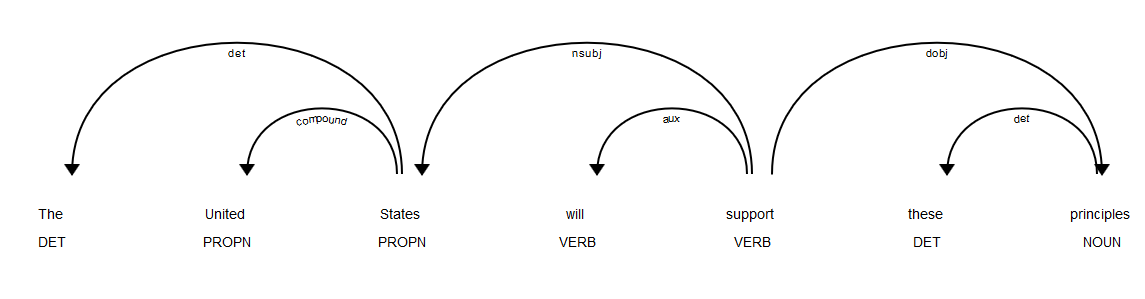

In [ ]:
# function for rule 3: noun(subject), verb, noun(object)
def rule3(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # if the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        # save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                                    
                            phrase += ' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [ ]:
# create a df containing sentence and its output for rule 3
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)
    
df_rule3 = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule3.head()

,Year,Sentence,Output
0,2003,"﻿Twenty four months ago, and yesterday in the ...",[]
1,2003,"Since that day, terrorists have struck in Bal...",[]
2,2003,"Last month, terrorists brought their war to t...",[terrorists bring war]
3,2003,The United Nations headquarters in Baghdad st...,[]
4,2003,"For that reason, the terrorists decided it mu...",[]


In [ ]:
# selecting non-empty output rows
df_show = pd.DataFrame(columns=df_rule3.columns)

for row in range(len(df_rule3)):
    
    if len(df_rule3.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule3.loc[row,:])

# reset the index
df_show.reset_index(inplace=True, drop=True)

In [ ]:
df_show.head()

,Year,Sentence,Output
0,2003,"Last month, terrorists brought their war to t...",[terrorists bring war]
1,2003,"Over the decades, that good and brave man fro...",[man give help]
2,2003,By the victims they choose and by the means t...,[terrorists clarify struggle]
3,2003,Those who target relief workers for death hav...,[who target workers]
4,2003,Those who incite murder and celebrate suicide...,"[who incite murder, Those reveal contempt]"


In [ ]:
# number of outputs
df_show.shape

(3994, 3)

In [ ]:
# separate subject, verb and object

verb_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):
    
    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, v, n2 = sent.split()[:1], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Verb':v,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        verb = sent.split()[1]
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

df_sep = pd.DataFrame(dis_list)

In [ ]:
# first 5 rows
df_sep.head()

,Sentence,Year,Noun1,Verb,Noun2
0,"Last month, terrorists brought their war to t...",2003,[terrorists],bring,[war]
1,"Over the decades, that good and brave man fro...",2003,[man],give,[help]
2,By the victims they choose and by the means t...,2003,[terrorists],clarify,[struggle]
3,Those who target relief workers for death hav...,2003,[who],target,[workers]
4,Those who incite murder and celebrate suicide...,2003,[who],incite,[murder]


In [ ]:
# top 10 verbs
df_sep['Verb'].value_counts()[:10]

have       353
take       161
make       129
support     96
give        94
see         78
face        57
provide     56
seek        56
build       52
Name: Verb, dtype: int64

In [ ]:
# selecting a verb and looking at its patterns
df_sep[df_sep['Verb']=='support'].head(15)

,Sentence,Year,Noun1,Verb,Noun2
14,All Governments that support terror are compl...,2003,[that],support,[terror]
229,That is why we have supported the efforts of ...,1999,[we],support,[efforts]
322,The United States strongly supports his leade...,1997,[States],support,[leadership]
382,The United States supports the United Kingdom...,1977,[States],support,[efforts]
487,All of this must support efforts to strengthe...,2009,[All],support,[efforts]
545,We will support the Millennium Development G...,2009,[We],support,[Goals]
551,That is why we will support honest police an...,2009,[we],support,[police]
573,"After the revolution, he supported the birth ...",2012,[he],support,[birth]
588,"Since then, the world has been captivated by ...",2012,[States],support,[forces]
591,"We supported change in Egypt, because our sup...",2012,[We],support,[change]


## 6. Rule 4: Relation Extraction part 2

Sample sentences from the dataset:
1.  With support from **many countries**, we have made **impressive progress**
2.  Because of their **unique expertise** and regional legitimacy, they can be instruments for solving some of the **hardest challenges** we face
3.  We are right to aim high and take on the **mightiest tasks**

In [ ]:
from spacy import displacy 
displacy.render(nlp("With support from many countries, we have made impressive progress"), style='dep',jupyter=True)

In [ ]:
# function for rule 4
def rule4(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [ ]:
# create a df containing sentence and its output for rule 4
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    # rule
    output = rule4(sent)
    
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule4 = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule4.head()

,Year,Sentence,Output
0,2003,"﻿Twenty four months ago, and yesterday in the ...",[unfinished war]
1,2003,"Since that day, terrorists have struck in Bal...",[]
2,2003,"Last month, terrorists brought their war to t...",[]
3,2003,The United Nations headquarters in Baghdad st...,[Nations headquarters]
4,2003,"For that reason, the terrorists decided it mu...",[]


In [ ]:
# selecting non-empty outputs
df_show = pd.DataFrame(columns=df_rule4.columns)

for row in range(len(df_rule4)):
    
    if len(df_rule4.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule4.loc[row,:])

# reset the index
df_show.reset_index(inplace=True, drop=True)

In [ ]:
# number of matches 
df_show.shape

(6203, 3)

In [ ]:
# first 15 rows
df_show.head(15)

,Year,Sentence,Output
0,2003,"﻿Twenty four months ago, and yesterday in the ...",[unfinished war]
1,2003,The United Nations headquarters in Baghdad st...,[Nations headquarters]
2,2003,"Over the decades, that good and brave man fro...",[good man]
3,2003,Those who target relief workers for death hav...,[relief workers]
4,2003,"They have no place in any religious faith, th...","[religious faith, world sympathy]"
5,2003,Events during the past two years have set bef...,"[past years, peaceful change]"
6,2003,All nations that fight terror as if the lives...,"[own people, favourable judgement]"
7,2003,The former regimes of Afghanistan and Iraq kn...,[former regimes]
8,2003,"Afghanistan President, who is here today, now...","[free people, decent society]"
9,2003,The regime of Saddam Hussain cultivated ties ...,[mass destruction]


### 7. Combining Rule 3 and Rule 4

Sample sentences:
1.  With support from many countries, **we** have **made impressive progress**
2. **It** will **require military planners** the world over to recognize that training for peace operations is a legitimate part of every nation security strategy

In [ ]:
# modifying rule 4
def rule4_mod(text,index):
    
    doc = nlp(text)

    phrase = ''
    
    # iterate over tokens
    for token in doc:
        
        if token.i == index:
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += ' '+subtoken.text
            break
    
    return phrase

In [ ]:
# using rule 3 and rule 4
def rule3_mod(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        # root word
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # look for subject modifier
                    adj = rule4_mod(text,sub_tok.i)
                    
                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                            
                            # look for object modifier
                            adj = rule4_mod(text,sub_tok.i)
                            
                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [ ]:
# create a df containing sentence and its output for modified rule
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3_mod(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)
    
df_rule = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,2003,"﻿Twenty four months ago, and yesterday in the ...",[]
1,2003,"Since that day, terrorists have struck in Bal...",[]
2,2003,"Last month, terrorists brought their war to t...",[ terrorists bring war]
3,2003,The United Nations headquarters in Baghdad st...,[]
4,2003,"For that reason, the terrorists decided it mu...",[]


In [ ]:
# selecting non-empty outputs
df_show_mod = pd.DataFrame(columns=df_rule.columns)

for row in range(len(df_rule)):
    
    if len(df_rule.loc[row,'Output'])!=0:
        df_show_mod = df_show_mod.append(df_rule.loc[row,:])

# reset the index
df_show_mod.reset_index(inplace=True, drop=True)

In [ ]:
# number of matches
df_show_mod.shape

(3994, 3)

In [ ]:
# first 15 rows
df_show_mod.head(20)

,Year,Sentence,Output
0,2003,"Last month, terrorists brought their war to t...",[ terrorists bring war]
1,2003,"Over the decades, that good and brave man fro...",[ good man give help]
2,2003,By the victims they choose and by the means t...,[ terrorists clarify struggle]
3,2003,Those who target relief workers for death hav...,[ who target relief workers]
4,2003,Those who incite murder and celebrate suicide...,"[ who incite murder, Those reveal contempt]"
5,2003,"They have no place in any religious faith, th...","[ They have place, they have claim, they hav..."
6,2003,Events during the past two years have set bef...,"[ who seek order, who spread chaos, who adop..."
7,2003,All Governments that support terror are compl...,[ that support terror]
8,2003,No Government should ignore the threat of ter...,[ Government ignore threat]
9,2003,All nations that fight terror as if the lives...,"[ that fight terror, nations earn favourable ..."


In [ ]:
# Sample sentence
print(df_show_mod.loc[4,'Output'])
print(df_show_mod.loc[4,'Sentence'])

[' who incite murder', ' Those reveal contempt']
 Those who incite murder and celebrate suicide reveal their contempt for life itself


In [ ]:
# Sample sentence
print(df_show_mod.loc[17,'Output'])
print(df_show_mod.loc[17,'Sentence'])

[' we discover fields']
 And as we discover the killing fields and mass graves of Iraq, the true scale of Saddam cruelty is being revealed


## 8. Rule 5: Patterns using Preposition

Sample sentences:
1.  We all believe the **benefits of globalization** must be allocated more broadly within and among societies
2. As the Millennium Summit reflected, we have no **shortage of** worthy **goals**
3. It should preserve the special **responsibility for peacekeeping** of the Security Council permanent members

In [ ]:


# Sample sentence
from spacy import displacy 
displacy.render(nlp('''We all believe the benefits of globalization must 
be allocated more broadly within and among societies'''), 
                style='dep',jupyter=True)

In [ ]:
# rule 5 function
def rule5(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''
            
            # if its head word is a noun
            if token.head.pos_=='NOUN':
                
                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text
                
                if len(phrase)>2:
                    sent.append(phrase)
                
    return sent

In [ ]:
# create a df containing sentence and its output for rule 5
row_list = []

for i in range(len(df2)):
    
    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    
    # rule
    output = rule5(sent)
    
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,2003,"﻿Twenty four months ago, and yesterday in the ...","[memory of America, centre of City, symbol of ..."
1,2003,"Since that day, terrorists have struck in Bal...","[advance of cause, cause in chaos]"
2,2003,"Last month, terrorists brought their war to t...",[]
3,2003,The United Nations headquarters in Baghdad st...,[headquarters in Baghdad]
4,2003,"For that reason, the terrorists decided it mu...",[]


In [ ]:
# select non-empty outputs
df_show = pd.DataFrame(columns=df_rule.columns)

for row in range(len(df_rule)):
    
    if len(df_rule.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule.loc[row,:])

# reset the index
df_show.reset_index(inplace = True, drop = True)

In [ ]:
# first 5 rows
df_show.head()

,Year,Sentence,Output
0,2003,"﻿Twenty four months ago, and yesterday in the ...","[memory of America, centre of City, symbol of ..."
1,2003,"Since that day, terrorists have struck in Bal...","[advance of cause, cause in chaos]"
2,2003,The United Nations headquarters in Baghdad st...,[headquarters in Baghdad]
3,2003,"Over the decades, that good and brave man fro...","[man from Brazil, people of Iraq, time of need]"
4,2003,"America joins you, his colleagues, in honouri...","[memory of Mello, memory of, service of Nations]"


In [ ]:
# separate noun, preposition and noun

prep_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):
    
    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1, p, n2 = sent.split()[0], sent.split()[1], sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Preposition':p,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        prep = sent.split()[1]
        if prep in prep_dict:
            prep_dict[prep]+=1
        else:
            prep_dict[prep]=1

df_sep= pd.DataFrame(dis_list)

In [ ]:
# first 10 rows
df_sep.head(10)

,Sentence,Year,Noun1,Preposition,Noun2
0,"﻿Twenty four months ago, and yesterday in the ...",2003,memory,of,[America]
1,"﻿Twenty four months ago, and yesterday in the ...",2003,centre,of,[City]
2,"﻿Twenty four months ago, and yesterday in the ...",2003,symbol,of,[war]
3,"Since that day, terrorists have struck in Bal...",2003,advance,of,[cause]
4,"Since that day, terrorists have struck in Bal...",2003,cause,in,[chaos]
5,The United Nations headquarters in Baghdad st...,2003,headquarters,in,[Baghdad]
6,"Over the decades, that good and brave man fro...",2003,man,from,[Brazil]
7,"Over the decades, that good and brave man fro...",2003,people,of,[Iraq]
8,"Over the decades, that good and brave man fro...",2003,time,of,[need]
9,"America joins you, his colleagues, in honouri...",2003,memory,of,[Mello]


In [ ]:
# top 10 prepositions
df_sep['Preposition'].value_counts()[:10]

of         6097
in         1180
for         883
to          561
on          348
with        232
between     199
from        143
against     121
as          113
Name: Preposition, dtype: int64

In [ ]:
# selecting a preposition and looking at its patterns
df_sep[df_sep['Preposition'] == 'against'].head(10)

,Sentence,Year,Noun1,Preposition,Noun2
21,All Governments that support terror are compl...,2003,war,against,[civilization]
27,They are building a nation fully joined in th...,2003,war,against,[terror]
66,We are conducting precision raids against ter...,2003,raids,against,[terrorists]
126,Every nation on every continent should genero...,2003,fight,against,[disease]
139,"Under the Trafficking Victims Protection Act,...",2003,sanctions,against,[Governments]
172,nation shall not lift up sword against nation...,1986,sword,against,[nation]
208,I refer here to a particularly disturbing exa...,1986,transgressions,against,[rights]
221,The threat does not come from defensive syste...,1986,shield,against,[attack]
250,When the United States began work technology ...,1986,defense,against,[missiles]
298,I pointed out how difficult it is for the Uni...,1986,war,against,[people]
